In [4]:
import pandas as pd
import mysql.connector as msql
from mysql.connector import Error
import seaborn as sns
import matplotlib.pyplot as plt
# This file contains our login information for the MySQL server
import credentials as C

# Find and plot the percentage of applications approved for self-employed applicants.

Lets pull the data from the db to see what we're working with.  Lets connect to the db first.

In [2]:
try:
    global conn
    conn = msql.connect(host = C.host_name, database = 'creditcard_capstone', 
                        user = C.user_name, password = C.password)
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
except Error as e:
    print('Error while connecting to MySQL',e)

You're connected to database:  ('creditcard_capstone',)


Lets create a SQL query that will pull the information we need to directly answer our question.

In [20]:
yes_self_sql = ("SELECT Application_Status, COUNT(*) AS Count "
                "FROM cdw_sapp_loan_application "
                "WHERE Self_employed = 'Yes' "
                "GROUP BY Application_Status")
cursor.execute(yes_self_sql)                #cursor was assigned in the connect_sql() function
yes_self_result = cursor.fetchall()          #fetches all the results
self_yes_df = pd.DataFrame(yes_self_result)
self_yes_df

,0,1
0,Y,46
1,N,24


Now lets visualize this data.

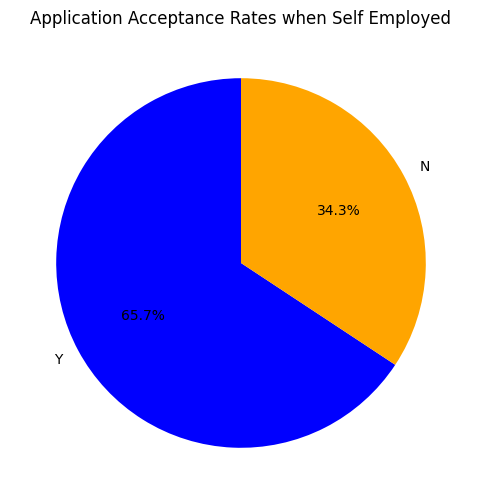

In [23]:
plt.figure(figsize=(6, 6))
plt.pie(self_yes_df.iloc[:, 1], labels=self_yes_df.iloc[:, 0], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Application Acceptance Rates when Self Employed')
plt.show()

Now lets compare it to the regular loan application acceptance rate.  First, lets pull the data for all application statuses using a SQL query.

In [21]:
norm_status_sql = ("SELECT Application_Status, COUNT(*) AS Count "
                    "FROM cdw_sapp_loan_application "
                    "GROUP BY Application_Status")
cursor.execute(norm_status_sql)                #cursor was assigned in the connect_sql() function
norm_results = cursor.fetchall()          #fetches all the results
norm_app_status_df = pd.DataFrame(norm_results)
norm_app_status_df

,0,1
0,Y,347
1,N,164


Lets look at the data side by side.

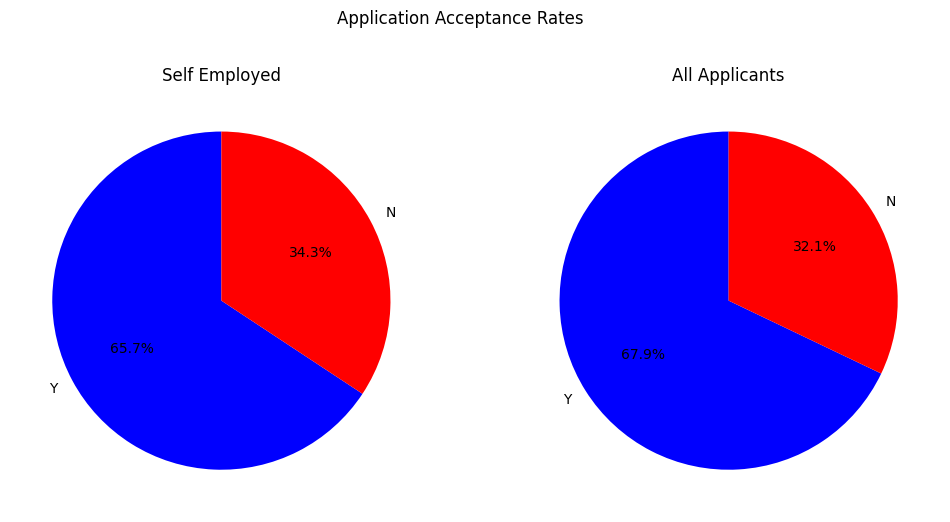

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Application Acceptance Rates")

# first pie chart
axes[0].pie(self_yes_df.iloc[:, 1], labels=self_yes_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[0].set_title('Self Employed')

# second pie chart
axes[1].pie(norm_app_status_df.iloc[:, 1], labels=norm_app_status_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[1].set_title('All Applicants')

plt.show()

# Find the percentage of rejection for married male applicants.

Lets create the SQL query to find the answer to the question.

In [40]:
mar_male_sql = ("SELECT Application_Status, COUNT(*) AS Count "
                    "FROM cdw_sapp_loan_application "
                    "WHERE Gender = 'Male' AND Married = 'Yes' "
                    "GROUP BY Application_Status "
                    "ORDER BY Count DESC")
cursor.execute(mar_male_sql)                #cursor was assigned in the connect_sql() function
mar_male_results = cursor.fetchall()          #fetches all the results
mar_male_df = pd.DataFrame(mar_male_results)
mar_male_df

,0,1
0,Y,219
1,N,87


Lets create a pie chart to see the results and, as a benchmark, lets create a second pie chart of all males to see how the married males compare.

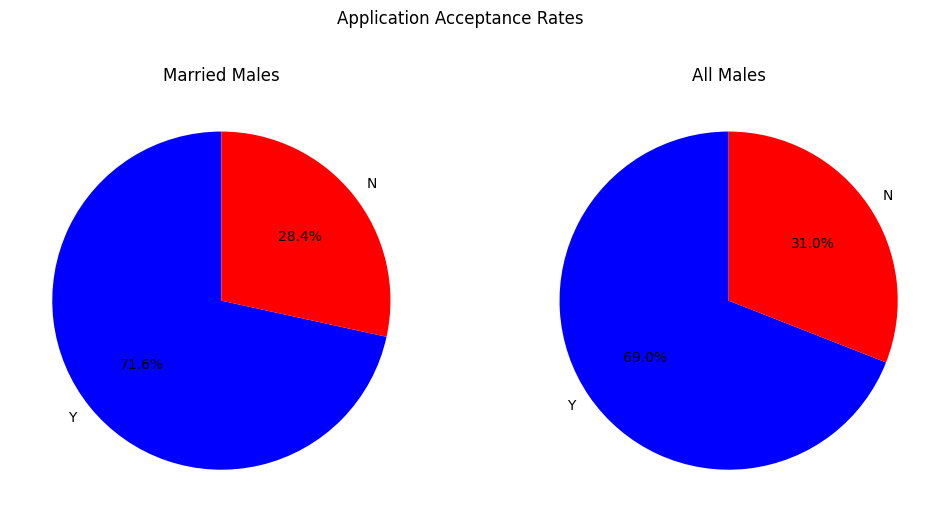

In [42]:
male_sql = ("SELECT Application_Status, COUNT(*) AS Count "
            "FROM cdw_sapp_loan_application "
            "WHERE Gender = 'Male' "
            "GROUP BY Application_Status")
cursor.execute(male_sql)                #cursor was assigned in the connect_sql() function
male_results = cursor.fetchall()          #fetches all the results
male_df = pd.DataFrame(male_results)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Application Acceptance Rates")

# first pie chart
axes[0].pie(mar_male_df.iloc[:, 1], labels=mar_male_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[0].set_title('Married Males')

# second pie chart
axes[1].pie(male_df.iloc[:, 1], labels=male_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[1].set_title('All Males')

plt.show()

Now lets compare married males to all married applicants regardless of gender to see if there is a gender bias.

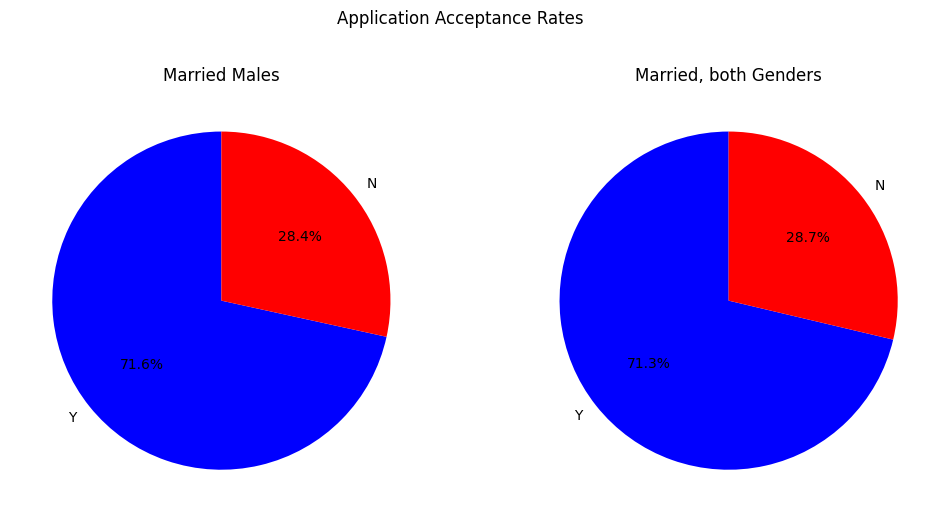

In [47]:
mar_sql = ("SELECT Application_Status, COUNT(*) AS Count "
            "FROM cdw_sapp_loan_application "
            "WHERE Married = 'Yes' "
            "GROUP BY Application_Status "
            "ORDER BY Count DESC")
cursor.execute(mar_sql)                #cursor was assigned in the connect_sql() function
mar_results = cursor.fetchall()          #fetches all the results
mar_df = pd.DataFrame(mar_results)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Application Acceptance Rates")

# first pie chart
axes[0].pie(mar_male_df.iloc[:, 1], labels=mar_male_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[0].set_title('Married Males')

# second pie chart
axes[1].pie(mar_df.iloc[:, 1], labels=mar_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[1].set_title('Married, both Genders')

plt.show()

# Find and plot the top three months with the largest transaction data.

# Find and plot which branch processed the highest total dollar value of healthcare transactions.